In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import pandas as pd

In [2]:
dataset = pd.read_csv('email-Eu-core-temporal.txt', delimiter=' ', header=None)
dataset.columns = ['source', 'target', 'timestamp']
edge_list = [(row['source'], row['target'], int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [4]:
# delta, K
fixed_k_config = [
    (1, 3),
    (2, 3),
    (3, 3),
    (5, 3),
    (10, 3),
    (15, 3)
]

## PaCo

In [5]:
def execute_paco(delta, k):
    start = time()
    C = paco(data, delta, k)
    end = time()
    
    count = sum(C.values())
    return count, end-start

In [6]:
results = []
for delta_sec, k in tqdm(fixed_k_config):
    result = execute_paco(delta_sec, k)
    results.append(result)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.40it/s]


In [7]:
#runtimes_min = [runtime_sec / 60 for _, runtime_sec in results]
#deltas_min = [delta_sec / 60 for delta_sec, _ in fixed_k_config]
_, paco_runtimes_sec = zip(*results)
paco_deltas_sec, _ = zip(*fixed_k_config)

## Baseline

In [8]:
t = create_temporal_network(edge_list)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 332334/332334 [00:04<00:00, 75956.69it/s]


In [9]:
results = []
for delta_sec, k in tqdm(fixed_k_config):
    result = get_total_causal_paths(t, delta_sec, k)
    results.append(result)

  0%|                                                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

2023-12-18 00:26:42 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:26:44 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		536793
Roots:		209479
Leaves:		327285
Links:		327336
Acyclic:	None

2023-12-18 00:26:44 [Severity.INFO]	Generating causal trees for 209479 root nodes ...
2023-12-18 00:26:50 [Severity.INFO]	finished.


 17%|█████████████████████████████▌                                                                                                                                                   | 1/6 [00:08<00:42,  8.57s/it]

Number of causal paths: Total path count: 		327307.0 
[Unique / Sub paths / Total]: 	[24961.0 / 654722.0 / 982029.0]
Nodes:				986 
Edges:				24929
Max. path length:		2
Avg path length:		1.0001099884817617 
Paths of length k = 0		0.0 [ 0.0 / 654650.0 / 654650.0 ]
Paths of length k = 1		327271.0 [ 24926.0 / 72.0 / 327343.0 ]
Paths of length k = 2		36.0 [ 35.0 / 0.0 / 36.0 ]


2023-12-18 00:26:50 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:26:55 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		863284
Roots:		209448
Leaves:		653776
Links:		654672
Acyclic:	None

2023-12-18 00:26:55 [Severity.INFO]	Generating causal trees for 209448 root nodes ...
2023-12-18 00:27:01 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		327276.0 
[Unique / Sub paths / Total]: 	[24992.0 / 654783.0 / 982059.0]
Nodes:				986 
Edges:				24929
Max. path length:		5
Avg path length:		1.000229164375023 
Paths of length k = 0		0.0 [ 0.0 / 654627.0 / 654627.0 ]
Paths of le

 33%|███████████████████████████████████████████████████████████                                                                                                                      | 2/6 [00:19<00:39,  9.83s/it]

2023-12-18 00:27:01 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:27:09 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1189405
Roots:		209424
Leaves:		979897
Links:		982008
Acyclic:	None

2023-12-18 00:27:09 [Severity.INFO]	Generating causal trees for 209424 root nodes ...
2023-12-18 00:27:15 [Severity.INFO]	finished.


 50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3/6 [00:33<00:35, 11.91s/it]

Number of causal paths: Total path count: 		327252.0 
[Unique / Sub paths / Total]: 	[25012.0 / 654813.0 / 982065.0]
Nodes:				986 
Edges:				24929
Max. path length:		5
Avg path length:		1.0003086306577194 
Paths of length k = 0		0.0 [ 0.0 / 654605.0 / 654605.0 ]
Paths of length k = 1		327154.0 [ 24923.0 / 199.0 / 327353.0 ]
Paths of length k = 2		97.0 [ 88.0 / 4.0 / 101.0 ]
Paths of length k = 3		0.0 [ 0.0 / 3.0 / 3.0 ]
Paths of length k = 4		0.0 [ 0.0 / 2.0 / 2.0 ]
Paths of length k = 5		1.0 [ 1.0 / 0.0 / 1.0 ]


2023-12-18 00:27:16 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:27:28 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1841028
Roots:		209356
Leaves:		1631520
Links:		1636680
Acyclic:	None

2023-12-18 00:27:28 [Severity.INFO]	Generating causal trees for 209356 root nodes ...
2023-12-18 00:27:36 [Severity.INFO]	finished.


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 4/6 [00:54<00:30, 15.35s/it]

Number of causal paths: Total path count: 		327184.0 
[Unique / Sub paths / Total]: 	[25119.0 / 655041.0 / 982225.0]
Nodes:				986 
Edges:				24929
Max. path length:		5
Avg path length:		1.0006785172869088 
Paths of length k = 0		0.0 [ 0.0 / 654590.0 / 654590.0 ]
Paths of length k = 1		326966.0 [ 24921.0 / 440.0 / 327406.0 ]
Paths of length k = 2		216.0 [ 196.0 / 6.0 / 222.0 ]
Paths of length k = 3		1.0 [ 1.0 / 3.0 / 4.0 ]
Paths of length k = 4		0.0 [ 0.0 / 2.0 / 2.0 ]
Paths of length k = 5		1.0 [ 1.0 / 0.0 / 1.0 ]


2023-12-18 00:27:36 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:28:07 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		3466884
Roots:		209198
Leaves:		3257376
Links:		3273360
Acyclic:	None

2023-12-18 00:28:07 [Severity.INFO]	Generating causal trees for 209198 root nodes ...
2023-12-18 00:28:17 [Severity.INFO]	finished.


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 5/6 [01:35<00:24, 24.82s/it]

Number of causal paths: Total path count: 		327027.0 
[Unique / Sub paths / Total]: 	[25319.0 / 655427.0 / 982454.0]
Nodes:				986 
Edges:				24929
Max. path length:		5
Avg path length:		1.0013882645775425 
Paths of length k = 0		0.0 [ 0.0 / 654508.0 / 654508.0 ]
Paths of length k = 1		326581.0 [ 24914.0 / 900.0 / 327481.0 ]
Paths of length k = 2		440.0 [ 401.0 / 14.0 / 454.0 ]
Paths of length k = 3		5.0 [ 3.0 / 3.0 / 8.0 ]
Paths of length k = 4		0.0 [ 0.0 / 2.0 / 2.0 ]
Paths of length k = 5		1.0 [ 1.0 / 0.0 / 1.0 ]


2023-12-18 00:28:18 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-18 00:29:09 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		5088212
Roots:		209020
Leaves:		4878704
Links:		4910040
Acyclic:	None

2023-12-18 00:29:09 [Severity.INFO]	Generating causal trees for 209020 root nodes ...
2023-12-18 00:29:11 [Severity.INFO]	Analyzing tree 20902/209020 ...
2023-12-18 00:29:12 [Severity.INFO]	Analyzing tree 41804/209020 ...
2023-12-18 00:29:13 [Severity.INFO]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:42<00:00, 27.01s/it]

Number of causal paths: Total path count: 		326854.0 
[Unique / Sub paths / Total]: 	[25571.0 / 656024.0 / 982878.0]
Nodes:				986 
Edges:				24929
Max. path length:		5
Avg path length:		1.0023496729426593 
Paths of length k = 0		0.0 [ 0.0 / 654476.0 / 654476.0 ]
Paths of length k = 1		326095.0 [ 24904.0 / 1527.0 / 327622.0 ]
Paths of length k = 2		752.0 [ 663.0 / 16.0 / 768.0 ]
Paths of length k = 3		6.0 [ 3.0 / 3.0 / 9.0 ]
Paths of length k = 4		0.0 [ 0.0 / 2.0 / 2.0 ]
Paths of length k = 5		1.0 [ 1.0 / 0.0 / 1.0 ]




In [10]:
_, baseline_runtimes_sec = zip(*results)
baseline_deltas_sec, _ = zip(*fixed_k_config)

## Plots

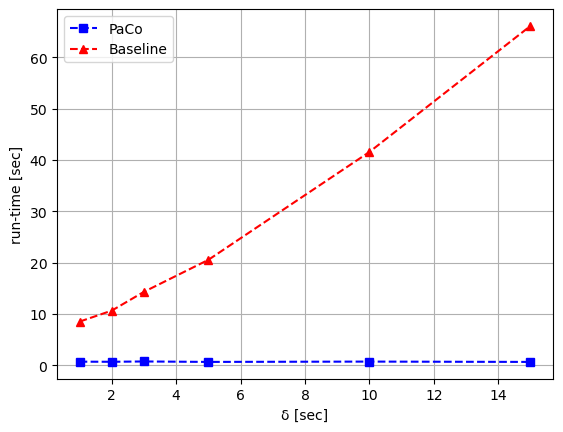

In [11]:
plt.plot(paco_deltas_sec, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_deltas_sec, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("δ [sec]")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/email_middle_panel.png')
plt.show()